# Word2Vecによる単語間距離の計算と可視化

In [113]:
import os
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import MeCab
from gensim.models import word2vec

mecab = MeCab.Tagger("-Ochasen -d /usr/lib/mecab/dic/mecab-ipadic-neologd/")

## データの読み込みと形態素解析
ライブドアニュースコーパス（ https://www.rondhuit.com/download.html )を読み込みます。

In [115]:
# コーパスのパス
path = "text/"

dirs = [i for i in os.listdir(path) if os.path.isdir(os.path.join(path, i))]
corpus = []
label_to_class = {i:j for i,j in enumerate(dirs)}
for i, d in enumerate(tqdm(dirs)):
    p = os.path.join(path, d)
    files = [i for i in os.listdir(p) if i[-4:]==".txt" and i!="LICENSE.txt"]
    for f in files:
        with open(os.path.join(p, f), encoding="utf-8") as f:
            lines = f.readlines()[2:]
            lines = "".join(lines).replace("\n","")
            node = mecab.parseToNode(lines)
            wakati = []
            while node:
                f = node.feature.split(",")[0]
                if f in ["名詞"]: # 今回は名詞のみ抽出した
                    wakati.append(node.surface)
                node = node.next
            corpus.append(wakati)

100%|██████████| 9/9 [00:16<00:00,  1.82s/it]


## モデルの学習

In [124]:
model = word2vec.Word2Vec(corpus,
                         size=300, #特徴ベクトルのサイズ
                         min_count=5, #これ以下の頻度の単語は除く
                         window=5, #前後いくつの単語を対象にするか
                         iter=10 #学習の反復回数
                         )
model.save("test.model")

## ある言葉とコサイン距離の近い言葉をプロット

In [117]:
def plotWords(target):
    results = model.wv.most_similar(positive=[target], topn=20)
    for i in results[:10]:
        print(i)
    words = [i[0] for i in results]
    words.append(target)
    vecs = [model.wv[i] for i in words]
    vecs = np.asarray(vecs)

    vecs_reduced = PCA(n_components=2).fit_transform(vecs)

    x = list(vecs_reduced[:-1,0])
    y = list(vecs_reduced[:-1,1])
    x_t = vecs_reduced[-1][0]
    y_t = vecs_reduced[-1][1]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c="blue")
    for i, j in enumerate(words):
        if i < len(words)-1:
            ax.annotate(j, xy=(x[i],y[i]))
    ax.scatter(x_t, y_t, c="red")
    ax.annotate(target, xy=(x_t,y_t))

('PC', 0.7485446333885193)
('Windows', 0.7030029892921448)
('デバイス', 0.701790452003479)
('周辺機器', 0.69066321849823)
('Firefox OS', 0.6794698238372803)
('ウイルス', 0.676650881767273)
('ノート', 0.6759986877441406)
('かんたん', 0.6758544445037842)
('モバイル端末', 0.6755996346473694)
('接続', 0.6741079092025757)


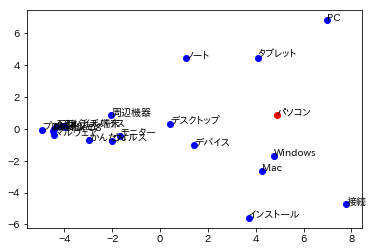

In [125]:
plotWords("パソコン")

('プロポーズ', 0.7675240635871887)
('親友', 0.7607660293579102)
('ケンカ', 0.750989556312561)
('告白', 0.7448469996452332)
('仲', 0.7422096133232117)
('妹', 0.74179607629776)
('恋人', 0.7318410873413086)
('不倫', 0.7195219993591309)
('ケイト', 0.7119702100753784)
('父親', 0.7111958861351013)


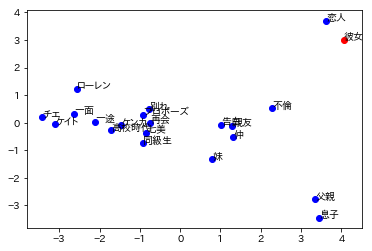

In [127]:
plotWords("彼女")

('営業マン', 0.7555394768714905)
('コンサルタント', 0.7156286239624023)
('やり方', 0.7140392661094666)
('趣味', 0.7116963863372803)
('コミュニケーション力', 0.7086434364318848)
('起業', 0.7030094861984253)
('学習', 0.6952210664749146)
('甘え', 0.6903007626533508)
('コミュニケーション能力', 0.6800615191459656)
('一生懸命', 0.6762401461601257)


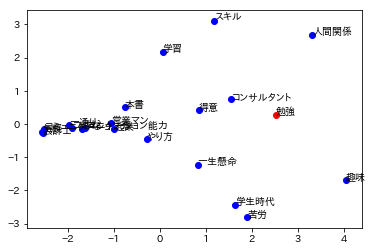

In [132]:
plotWords("勉強")

('前田敦子', 0.8681848645210266)
('マツコ', 0.8388852477073669)
('芸人', 0.8221485018730164)
('高橋みなみ', 0.8140881657600403)
('暴露', 0.8088986277580261)
('大島優子', 0.8068477511405945)
('夏目三久', 0.8067121505737305)
('篠田', 0.8038926124572754)
('お笑い芸人', 0.8028404116630554)
('号泣', 0.8016829490661621)


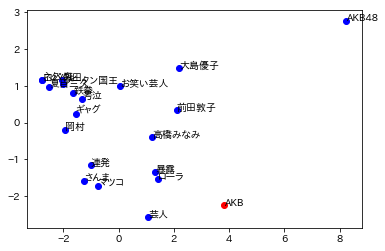

In [135]:
plotWords("AKB")

## 学習済みモデルの利用
Wikipediaの記事を学習したモデル（http://aial.shiroyagi.co.jp/2017/02/japanese-word2vec-model-builder/ ）を読み込みます

In [136]:
model = word2vec.Word2Vec.load("word2vec.gensim.model")

('携帯電話', 0.8369840383529663)
('携帯端末', 0.8201552033424377)
('PC', 0.819959282875061)
('ノートパソコン', 0.8156601786613464)
('プリンター', 0.8125709891319275)
('ワープロ', 0.8041254281997681)
('PDA', 0.7948293089866638)
('携帯情報端末', 0.7832269668579102)
('ゲーム機', 0.7827727198600769)
('ユーザー', 0.7748121619224548)


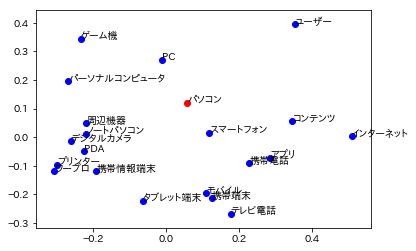

In [138]:
plotWords("パソコン")

('勉学', 0.8186373114585876)
('独学', 0.7890471816062927)
('苦学', 0.7772663831710815)
('通い', 0.7666284441947937)
('受験勉強', 0.7515323758125305)
('習得', 0.7508496642112732)
('修業', 0.7469962239265442)
('聴講', 0.7421830296516418)
('学業', 0.7375432252883911)
('上達', 0.7363994121551514)


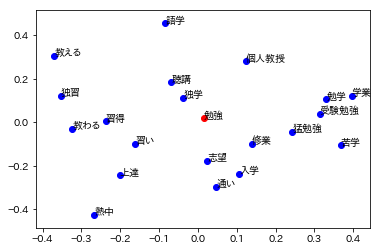

In [139]:
plotWords("勉強")

('ももクロ', 0.8058090806007385)
('めちゃイケ', 0.7964253425598145)
('ガチ', 0.7927309274673462)
('!!」', 0.7859619855880737)
('ウリナリ', 0.7840250730514526)
('おめでとう', 0.7760754823684692)
('めちゃ', 0.7716407775878906)
('今週', 0.770725667476654)
('!!!」', 0.7694569230079651)
('!?」', 0.7623531222343445)


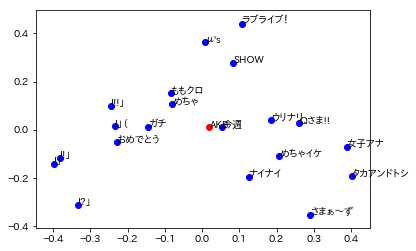

In [140]:
plotWords("AKB")

## 言葉同士の足し算
京都＋大学＝？？

In [141]:
results = model.wv.most_similar(positive=["京都","大学"], topn=50)
for i in results[:10]:
    print(i)

('同志社', 0.8211780786514282)
('高等商業学校', 0.8130326867103577)
('高商', 0.8012980222702026)
('慶應義塾', 0.7975603342056274)
('帝大', 0.7818061709403992)
('明治学院', 0.7796804308891296)
('母校', 0.7749128937721252)
('青山学院', 0.7690324783325195)
('商業学校', 0.7679327130317688)
('女学校', 0.7560425996780396)
